In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sns
root_dir="teamfiles"
all_data_df= pd.DataFrame()


In [2]:
years=['1516', '1617','1718', '1819']

for year in years:
    year_df = pd.read_csv(f"{root_dir}/season-{year}_csv.csv")
    year_df['Season'] = year
        
    all_data_df = all_data_df.append(year_df)
   
    
    print(f"{root_dir}/season-{year}_csv")

all_data_df


teamfiles/season-1516_csv
teamfiles/season-1617_csv
teamfiles/season-1718_csv
teamfiles/season-1819_csv


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Season
0,E0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,0,D,...,26,-0.5,1.98,1.93,1.99,1.92,1.82,3.88,4.70,1516
1,E0,08/08/15,Chelsea,Swansea,2,2,D,2,1,H,...,27,-1.5,2.24,2.16,1.80,1.73,1.37,5.04,10.88,1516
2,E0,08/08/15,Everton,Watford,2,2,D,0,1,A,...,26,-1.0,2.28,2.18,1.76,1.71,1.75,3.76,5.44,1516
3,E0,08/08/15,Leicester,Sunderland,4,2,H,3,0,H,...,26,-0.5,2.00,1.95,1.96,1.90,1.79,3.74,5.10,1516
4,E0,08/08/15,Man United,Tottenham,1,0,H,1,0,H,...,26,-1.0,2.20,2.09,1.82,1.78,1.64,4.07,6.04,1516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,22,-1.5,1.98,1.91,2.01,1.95,1.32,5.89,9.48,1819
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,21,-2.0,2.52,2.32,1.72,1.64,1.30,6.06,9.71,1819
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,22,-1.5,2.27,2.16,1.80,1.73,1.37,5.36,8.49,1819
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,19,-0.5,2.13,2.08,1.85,1.80,1.91,3.81,4.15,1819


In [3]:
xcolumns = ['Div','B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'Referee']
all_data_df.drop(labels=xcolumns, axis=1, inplace=True)

In [4]:
all_data_df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'Season'],
      dtype='object')

In [5]:
all_data_df.rename(columns={'FTHG': 'FT Home Goals', 'FTAG': 'FT Away Goals', 'FTR':'FT Winner', 'HTHG': 'HT Home Goals',
                           'HTAG': 'HT Away Goals', 'HTR': 'HT Winner', 'HS': 'Home Shots', 'AS': 'Away Shots',
                           'HST': 'Home Shots OT', 'AST': 'Away Shots OT', 'HF': 'Home Fouls', 'AF': 'Away Fouls', 
                           'HC': 'Home Corners', 'AC': 'Away Corner', 'HY': 'Home Yellow Cards', 'AY': 'Away Yellow Cards',
                           'HR': 'Home Red Cards', 'AR': 'Away Red Cards'},inplace=True)
all_data_df

,Date,HomeTeam,AwayTeam,FT Home Goals,FT Away Goals,FT Winner,HT Home Goals,HT Away Goals,HT Winner,Home Shots,...,Away Shots OT,Home Fouls,Away Fouls,Home Corners,Away Corner,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards,Season
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,0,D,11,...,3,13,13,6,3,3,4,0,0,1516
1,08/08/15,Chelsea,Swansea,2,2,D,2,1,H,11,...,10,15,16,4,8,1,3,1,0,1516
2,08/08/15,Everton,Watford,2,2,D,0,1,A,10,...,5,7,13,8,2,1,2,0,0,1516
3,08/08/15,Leicester,Sunderland,4,2,H,3,0,H,19,...,5,13,17,6,3,2,4,0,0,1516
4,08/08/15,Man United,Tottenham,1,0,H,1,0,H,9,...,4,12,12,1,2,2,3,0,0,1516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,13,...,2,3,11,4,1,0,2,0,0,1819
376,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,26,...,4,9,6,11,2,3,3,0,0,1819
377,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,10,...,3,8,6,4,3,0,1,0,0,1819
378,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,11,...,9,10,13,7,4,0,2,0,0,1819


In [6]:
all_data_df.loc[all_data_df['FT Winner']=='H', 'Home Points']  = 3 
all_data_df.loc[all_data_df['FT Winner']=='H', 'Home Win']  = 1
all_data_df.loc[all_data_df['FT Winner']=='H', 'Away Win']  = 0 
all_data_df.loc[all_data_df['FT Winner']=='H', 'Draw']  = 0 
all_data_df.loc[all_data_df['FT Winner']=='H', 'Away Points']  = 0
all_data_df.loc[all_data_df['FT Winner']=='A', 'Away Points']  = 3
all_data_df.loc[all_data_df['FT Winner']=='A', 'Away Win']  = 1 
all_data_df.loc[all_data_df['FT Winner']=='A', 'Home Win']  = 0 
all_data_df.loc[all_data_df['FT Winner']=='A', 'Draw']  = 0 
all_data_df.loc[all_data_df['FT Winner']=='A', 'Home Points']  = 0
all_data_df.loc[all_data_df['FT Winner']=='D', 'Home Points']  = 1
all_data_df.loc[all_data_df['FT Winner']=='D', 'Away Points']  = 1
all_data_df.loc[all_data_df['FT Winner']=='D', 'Draw']  = 1 
all_data_df.loc[all_data_df['FT Winner']=='D', 'Home Win']  = 0 
all_data_df.loc[all_data_df['FT Winner']=='D', 'Away Win']  = 0 
all_data_df

,Date,HomeTeam,AwayTeam,FT Home Goals,FT Away Goals,FT Winner,HT Home Goals,HT Away Goals,HT Winner,Home Shots,...,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards,Season,Home Points,Home Win,Away Win,Draw,Away Points
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,0,D,11,...,3,4,0,0,1516,0.0,0.0,1.0,0.0,3.0
1,08/08/15,Chelsea,Swansea,2,2,D,2,1,H,11,...,1,3,1,0,1516,1.0,0.0,0.0,1.0,1.0
2,08/08/15,Everton,Watford,2,2,D,0,1,A,10,...,1,2,0,0,1516,1.0,0.0,0.0,1.0,1.0
3,08/08/15,Leicester,Sunderland,4,2,H,3,0,H,19,...,2,4,0,0,1516,3.0,1.0,0.0,0.0,0.0
4,08/08/15,Man United,Tottenham,1,0,H,1,0,H,9,...,2,3,0,0,1516,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,13,...,0,2,0,0,1819,3.0,1.0,0.0,0.0,0.0
376,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,26,...,3,3,0,0,1819,0.0,0.0,1.0,0.0,3.0
377,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,10,...,0,1,0,0,1819,1.0,0.0,0.0,1.0,1.0
378,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,11,...,0,2,0,0,1819,1.0,0.0,0.0,1.0,1.0


In [7]:
s16 = all_data_df.loc[all_data_df['Season']=='1516']
s17 = all_data_df.loc[all_data_df['Season']=='1617']
s18 = all_data_df.loc[all_data_df['Season']=='1718']
s19 = all_data_df.loc[all_data_df['Season']=='1819']


In [8]:
home_wins = all_data_df.groupby('HomeTeam')['Home Points' ,'Home Win', 'Draw'].sum()
away_wins = all_data_df.groupby('AwayTeam')['Away Points' ,'Away Win', 'Draw'].sum()
away_wins = away_wins.rename(columns={'Draw': 'Away Draws'})
wins= pd.concat([home_wins,away_wins], axis=1)
#wins = wins.groupby('Season')

wins['Total Draws'] = wins['Draw'] + wins['Away Draws']
wins['Total Wins'] = wins['Home Win'] + wins['Away Win'] 
wins['Total Points'] = wins['Home Points'] + wins['Away Points'] 
wins.sort_values('Total Points',ascending=False, inplace=True)
wins = wins.drop(['Draw', 'Away Draws'], axis=1)
wins

C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Home Points,Home Win,Away Points,Away Win,Total Draws,Total Wins,Total Points
Man City,182.0,57.0,160.0,49.0,24.0,106.0,342.0
Liverpool,169.0,49.0,139.0,40.0,41.0,89.0,308.0
Tottenham,170.0,52.0,134.0,39.0,31.0,91.0,304.0
Chelsea,154.0,45.0,131.0,39.0,33.0,84.0,285.0
Man United,158.0,45.0,124.0,36.0,39.0,81.0,282.0
Arsenal,177.0,55.0,102.0,28.0,30.0,83.0,279.0
Leicester,130.0,37.0,94.0,25.0,38.0,62.0,224.0
Everton,134.0,39.0,77.0,17.0,43.0,56.0,211.0
West Ham,117.0,32.0,84.0,21.0,42.0,53.0,201.0
Southampton,102.0,26.0,82.0,20.0,46.0,46.0,184.0


In [9]:
home16_wins = s16.groupby(['HomeTeam','Season'])['Home Points' ,'Home Win', 'Draw'].sum()
away16_wins = s16.groupby(['AwayTeam','Season'])['Away Points' ,'Away Win', 'Draw'].sum()
away16_wins = away16_wins.rename(columns={'Draw': 'Away Draws'})
wins16= pd.concat([home16_wins,away16_wins], axis=1)

wins16['Total Draws'] =wins16['Draw'] +wins16['Away Draws']
wins16['Total wins'] =wins16['Home Win'] +wins16['Away Win'] 
wins16['Total Points'] =wins16['Home Points'] +wins16['Away Points'] 
wins16.sort_values('Total Points',ascending=False, inplace=True)
wins16 =wins16.drop(['Draw', 'Away Draws'], axis=1)

wins16


C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,,Home Points,Home Win,Away Points,Away Win,Total Draws,Total wins,Total Points
HomeTeam,Season,,,,,,,
Leicester,1516,42.0,12.0,39.0,11.0,12.0,23.0,81.0
Arsenal,1516,40.0,12.0,31.0,8.0,11.0,20.0,71.0
Tottenham,1516,36.0,10.0,34.0,9.0,13.0,19.0,70.0
Man United,1516,41.0,12.0,25.0,7.0,9.0,19.0,66.0
Man City,1516,38.0,12.0,28.0,7.0,9.0,19.0,66.0
Southampton,1516,36.0,11.0,27.0,7.0,9.0,18.0,63.0
West Ham,1516,34.0,9.0,28.0,7.0,14.0,16.0,62.0
Liverpool,1516,32.0,8.0,28.0,8.0,12.0,16.0,60.0
Stoke,1516,28.0,8.0,23.0,6.0,9.0,14.0,51.0


In [10]:
home17_wins = s17.groupby(['HomeTeam','Season'])['Home Points' ,'Home Win', 'Draw'].sum()
away17_wins = s17.groupby(['AwayTeam','Season'])['Away Points' ,'Away Win', 'Draw'].sum()
away17_wins = away17_wins.rename(columns={'Draw': 'Away Draws'})
wins17= pd.concat([home17_wins,away17_wins], axis=1)

wins17['Total Draws'] =wins17['Draw'] +wins17['Away Draws']
wins17['Total wins'] =wins17['Home Win'] +wins17['Away Win'] 
wins17['Total Points'] =wins17['Home Points'] +wins17['Away Points'] 
wins17.sort_values('Total Points',ascending=False, inplace=True)
wins17 =wins17.drop(['Draw', 'Away Draws'], axis=1)

wins17


C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,,Home Points,Home Win,Away Points,Away Win,Total Draws,Total wins,Total Points
HomeTeam,Season,,,,,,,
Chelsea,1617,51.0,17.0,42.0,13.0,3.0,30.0,93.0
Tottenham,1617,53.0,17.0,33.0,9.0,8.0,26.0,86.0
Man City,1617,40.0,11.0,38.0,12.0,9.0,23.0,78.0
Liverpool,1617,41.0,12.0,35.0,10.0,10.0,22.0,76.0
Arsenal,1617,45.0,14.0,30.0,9.0,6.0,23.0,75.0
Man United,1617,34.0,8.0,35.0,10.0,15.0,18.0,69.0
Everton,1617,43.0,13.0,18.0,4.0,10.0,17.0,61.0
Bournemouth,1617,31.0,9.0,15.0,3.0,10.0,12.0,46.0
Southampton,1617,24.0,6.0,22.0,6.0,10.0,12.0,46.0


In [11]:
home18_wins = s18.groupby(['HomeTeam','Season'])['Home Points' ,'Home Win', 'Draw'].sum()
away18_wins = s18.groupby(['AwayTeam','Season'])['Away Points' ,'Away Win', 'Draw'].sum()
away18_wins = away18_wins.rename(columns={'Draw': 'Away Draws'})
wins18= pd.concat([home18_wins,away18_wins], axis=1)

wins18['Total Draws'] =wins18['Draw'] +wins18['Away Draws']
wins18['Total wins'] =wins18['Home Win'] +wins18['Away Win'] 
wins18['Total Points'] =wins18['Home Points'] +wins18['Away Points'] 
wins18.sort_values('Total Points',ascending=False, inplace=True)
wins18 =wins18.drop(['Draw', 'Away Draws'], axis=1)

wins18


C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,,Home Points,Home Win,Away Points,Away Win,Total Draws,Total wins,Total Points
HomeTeam,Season,,,,,,,
Man City,1718,50.0,16.0,50.0,16.0,4.0,32.0,100.0
Man United,1718,47.0,15.0,34.0,10.0,6.0,25.0,81.0
Tottenham,1718,43.0,13.0,34.0,10.0,8.0,23.0,77.0
Liverpool,1718,43.0,12.0,32.0,9.0,12.0,21.0,75.0
Chelsea,1718,37.0,11.0,33.0,10.0,7.0,21.0,70.0
Arsenal,1718,47.0,15.0,16.0,4.0,6.0,19.0,63.0
Burnley,1718,26.0,7.0,28.0,7.0,12.0,14.0,54.0
Everton,1718,34.0,10.0,15.0,3.0,10.0,13.0,49.0
Leicester,1718,27.0,7.0,20.0,5.0,11.0,12.0,47.0


In [12]:
home19_wins = s19.groupby(['HomeTeam','Season'])['Home Points' ,'Home Win', 'Draw'].sum()
away19_wins = s19.groupby(['AwayTeam','Season'])['Away Points' ,'Away Win', 'Draw'].sum()
away19_wins = away19_wins.rename(columns={'Draw': 'Away Draws'})
wins19= pd.concat([home19_wins,away19_wins], axis=1)

wins19['Total Draws'] =wins19['Draw'] +wins19['Away Draws']
wins19['Total wins'] =wins19['Home Win'] +wins19['Away Win'] 
wins19['Total Points'] =wins19['Home Points'] +wins19['Away Points'] 
wins19.sort_values('Total Points',ascending=False, inplace=True)
wins19 =wins19.drop(['Draw', 'Away Draws'], axis=1)

wins19


C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,,Home Points,Home Win,Away Points,Away Win,Total Draws,Total wins,Total Points
HomeTeam,Season,,,,,,,
Man City,1819,54.0,18.0,44.0,14.0,2.0,32.0,98.0
Liverpool,1819,53.0,17.0,44.0,13.0,7.0,30.0,97.0
Chelsea,1819,42.0,12.0,30.0,9.0,9.0,21.0,72.0
Tottenham,1819,38.0,12.0,33.0,11.0,2.0,23.0,71.0
Arsenal,1819,45.0,14.0,25.0,7.0,7.0,21.0,70.0
Man United,1819,36.0,10.0,30.0,9.0,9.0,19.0,66.0
Wolves,1819,34.0,10.0,23.0,6.0,9.0,16.0,57.0
Everton,1819,34.0,10.0,20.0,5.0,9.0,15.0,54.0
West Ham,1819,31.0,9.0,21.0,6.0,7.0,15.0,52.0


In [13]:
wins19.tail()

,,Home Points,Home Win,Away Points,Away Win,Total Draws,Total wins,Total Points
HomeTeam,Season,,,,,,,
Southampton,1819,23.0,5.0,16.0,4.0,12.0,9.0,39.0
Brighton,1819,23.0,6.0,13.0,3.0,9.0,9.0,36.0
Cardiff,1819,20.0,6.0,14.0,4.0,4.0,10.0,34.0
Fulham,1819,21.0,6.0,5.0,1.0,5.0,7.0,26.0
Huddersfield,1819,9.0,2.0,7.0,1.0,7.0,3.0,16.0


In [14]:
wins_season= pd.concat([wins16,wins17,wins18,wins19], axis=0)

wins_season

,,Home Points,Home Win,Away Points,Away Win,Total Draws,Total wins,Total Points
HomeTeam,Season,,,,,,,
Leicester,1516,42.0,12.0,39.0,11.0,12.0,23.0,81.0
Arsenal,1516,40.0,12.0,31.0,8.0,11.0,20.0,71.0
Tottenham,1516,36.0,10.0,34.0,9.0,13.0,19.0,70.0
Man United,1516,41.0,12.0,25.0,7.0,9.0,19.0,66.0
Man City,1516,38.0,12.0,28.0,7.0,9.0,19.0,66.0
...,...,...,...,...,...,...,...,...
Southampton,1819,23.0,5.0,16.0,4.0,12.0,9.0,39.0
Brighton,1819,23.0,6.0,13.0,3.0,9.0,9.0,36.0
Cardiff,1819,20.0,6.0,14.0,4.0,4.0,10.0,34.0


In [15]:
wins_season.reset_index(inplace=True)

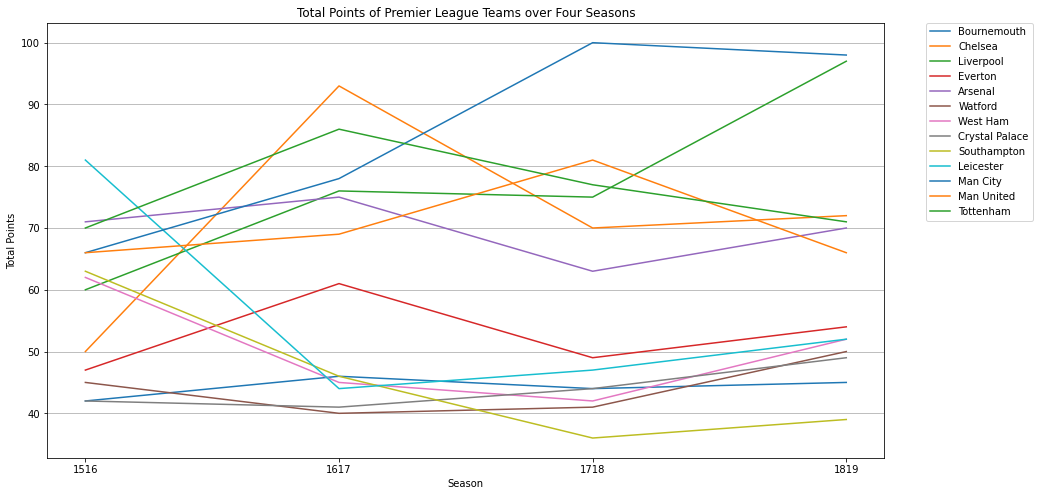

In [16]:
plt.figure(figsize=(15,8))
for team in set(wins_season['HomeTeam']):
    temp=wins_season[wins_season['HomeTeam']==team]
    if len(temp) < 4:
        continue
    plt.plot(temp['Season'],temp['Total Points'], label=team)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Season')
    plt.ylabel('Total Points')
    plt.title('Total Points of Premier League Teams over Four Seasons')
    plt.grid(axis='y')
plt.savefig('Presentation/AllTeams4Seasons.png')


In [17]:
city=wins_season[wins_season['HomeTeam']=='Man City']
liv=wins_season[wins_season['HomeTeam']=='Liverpool']
tot=wins_season[wins_season['HomeTeam']=='Tottenham']
chel=wins_season[wins_season['HomeTeam']=='Chelsea']
manu=wins_season[wins_season['HomeTeam']=='Man United']
top_teams=pd.concat([city,liv,tot,chel,manu], axis=0)
top_teams


,HomeTeam,Season,Home Points,Home Win,Away Points,Away Win,Total Draws,Total wins,Total Points
4,Man City,1516,38.0,12.0,28.0,7.0,9.0,19.0,66.0
22,Man City,1617,40.0,11.0,38.0,12.0,9.0,23.0,78.0
40,Man City,1718,50.0,16.0,50.0,16.0,4.0,32.0,100.0
60,Man City,1819,54.0,18.0,44.0,14.0,2.0,32.0,98.0
7,Liverpool,1516,32.0,8.0,28.0,8.0,12.0,16.0,60.0
23,Liverpool,1617,41.0,12.0,35.0,10.0,10.0,22.0,76.0
43,Liverpool,1718,43.0,12.0,32.0,9.0,12.0,21.0,75.0
61,Liverpool,1819,53.0,17.0,44.0,13.0,7.0,30.0,97.0
2,Tottenham,1516,36.0,10.0,34.0,9.0,13.0,19.0,70.0
21,Tottenham,1617,53.0,17.0,33.0,9.0,8.0,26.0,86.0


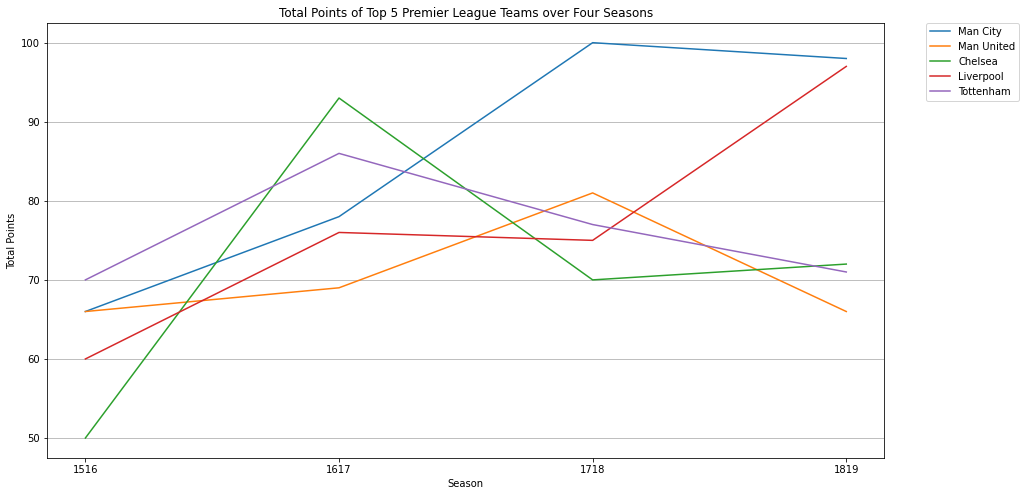

In [18]:
plt.figure(figsize=(15,8))
for team in set(top_teams['HomeTeam']):
    temp=wins_season[wins_season['HomeTeam']==team]
    plt.plot(temp['Season'],temp['Total Points'], label=team)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Season')
    plt.ylabel('Total Points')
    plt.title('Total Points of Top 5 Premier League Teams over Four Seasons')
    plt.grid(axis='y')
plt.savefig('Presentation/5Teams4Seasons.png')

In [19]:
wins_season.reset_index(inplace=True)

In [20]:
wins16.reset_index(inplace=True)

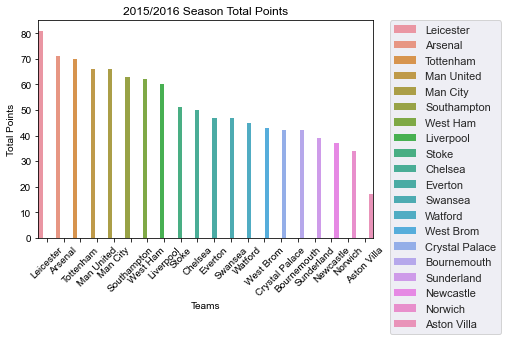

In [21]:
total16 = sns.barplot(x='HomeTeam', y='Total Points',hue='HomeTeam', data=wins16)
sns.set(rc={'figure.figsize':(15,5)})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
def change_width(total16, new_value) :
    for patch in total16.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(total16, .25)
plt.xticks(rotation=45)
plt.xlabel('Teams')
plt.title('2015/2016 Season Total Points')
plt.show()
total16.figure.savefig('Presentation/Season16.png')

In [22]:
wins17.reset_index(inplace=True)
wins18.reset_index(inplace=True)
wins19.reset_index(inplace=True)

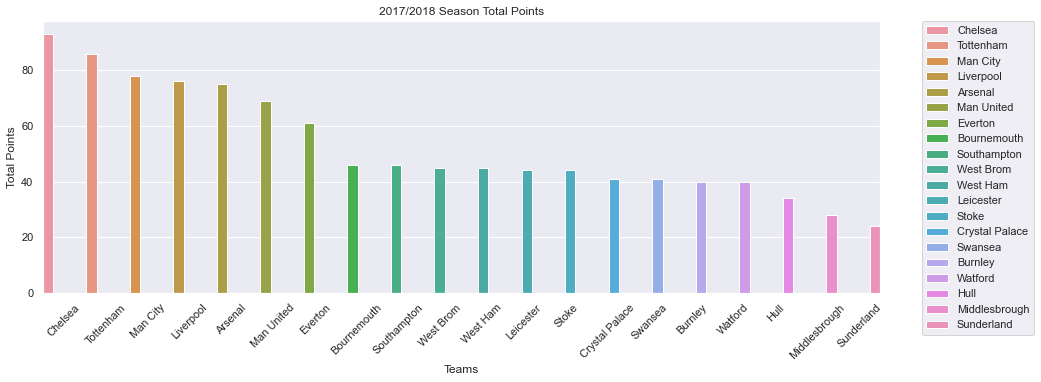

In [23]:
total17 = sns.barplot(x='HomeTeam', y='Total Points',hue='HomeTeam', data=wins17)
sns.set(rc={'figure.figsize':(15,5)})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
def change_width(total17, new_value) :
    for patch in total17.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(total17, .25)
plt.xticks(rotation=45)
plt.xlabel('Teams')
plt.title('2017/2018 Season Total Points')
plt.show()
total17.figure.savefig('Presentation/Season17.png')

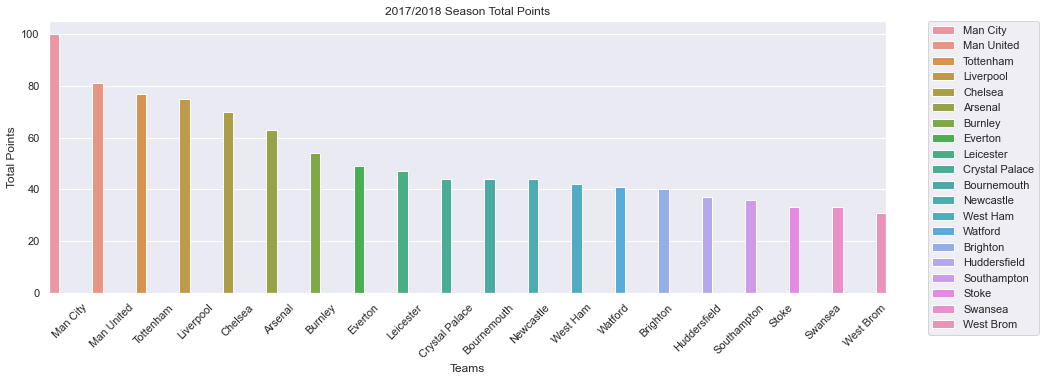

In [24]:
total18 = sns.barplot(x='HomeTeam', y='Total Points',hue='HomeTeam', data=wins18)
sns.set(rc={'figure.figsize':(15,5)})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
def change_width(total18, new_value) :
    for patch in total18.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(total18, .25)
plt.xticks(rotation=45)
plt.xlabel('Teams')
plt.title('2017/2018 Season Total Points')
plt.show()
total18.figure.savefig('Presentation/Season18.png')

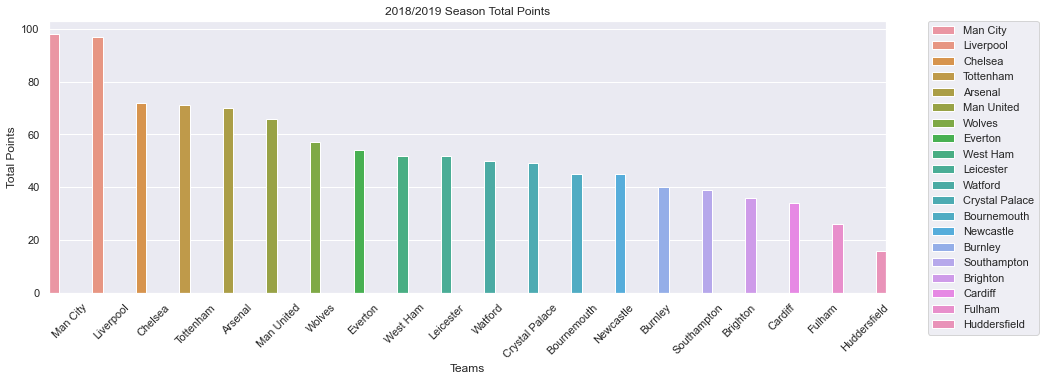

In [25]:
total19 = sns.barplot(x='HomeTeam', y='Total Points',hue='HomeTeam', data=wins19)
sns.set(rc={'figure.figsize':(15,5)})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
def change_width(total19, new_value) :
    for patch in total19.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(total19, .25)
plt.xticks(rotation=45)
plt.xlabel('Teams')
plt.title('2018/2019 Season Total Points')
plt.show()
total19.figure.savefig('Presentation/Season19.png')

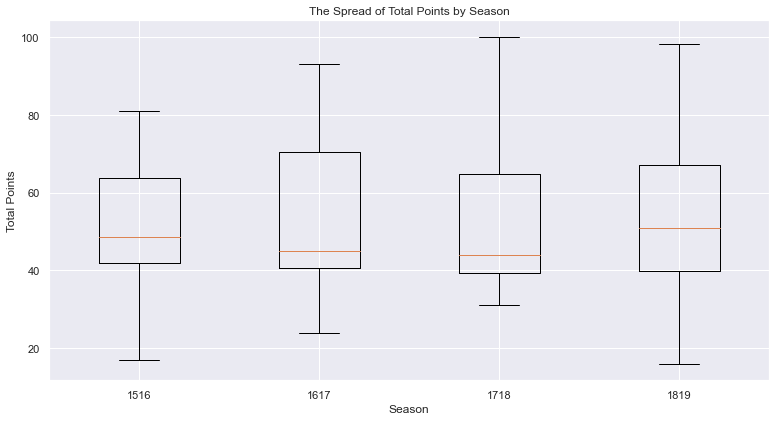

In [44]:
data=[wins16['Total Points'],wins17['Total Points'],wins18['Total Points'],wins19['Total Points']]
fig = plt.figure(figsize =(10, 5)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data, labels=['1516','1617','1718','1819']) 
  
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.title('The Spread of Total Points by Season')
plt.savefig('Presentation/TotalptsBox.png')
plt.show() 


In [27]:
top19=wins19.iloc[:4]
top18=wins18.iloc[:4]
top17=wins17.iloc[:4]
top16=wins16.iloc[:4]
reg19=wins19.iloc[17:20]
reg17=wins17.iloc[17:20]
reg16=wins16.iloc[17:20]
reg18=wins18.iloc[17:20]
top_all= pd.concat([top16,top17,top18,top19], axis=0)
reg_all= pd.concat([reg16,reg17,reg18,reg19], axis=0)


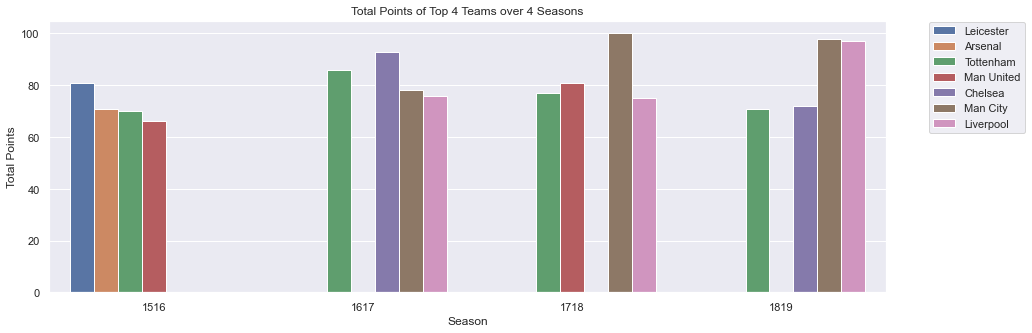

In [28]:
sns.set(rc={'figure.figsize':(15,5)})
top_teams = sns.barplot( data=top_all, x='Season', y='Total Points',hue='HomeTeam')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)
plt.title('Total Points of Top 4 Teams over 4 Seasons')
plt.show()
top_teams.figure.savefig('Presentation/TopTeamsTotalpts.png')

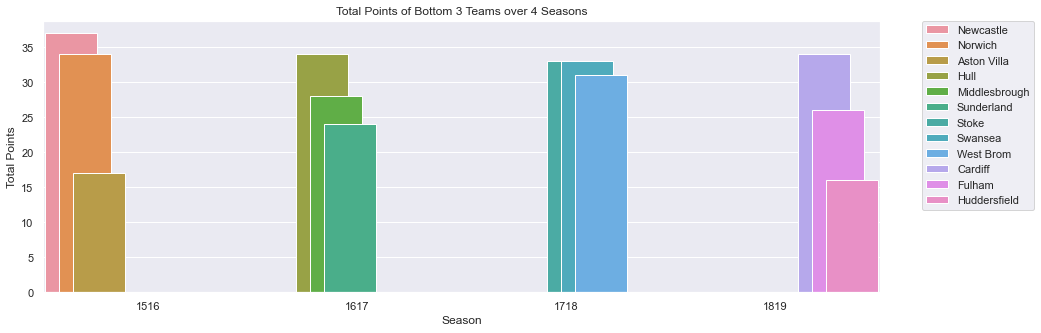

In [29]:

fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15,5)})
relegation_teams = sns.barplot(x='Season', y='Total Points',hue='HomeTeam',ax=ax, data=reg_all)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
change_width(ax, .25)
plt.title('Total Points of Bottom 3 Teams over 4 Seasons')
plt.show()
relegation_teams.figure.savefig('Presentation/BottomTeamsTotalpts.png')

In [30]:
home_sts = all_data_df.groupby('HomeTeam')['Home Fouls' ,'Home Corners','FT Home Goals', 'Home Yellow Cards','Home Red Cards', 'Home Shots OT', 'Home Points'].sum()
away_sts = all_data_df.groupby('AwayTeam')['Away Fouls' ,'Away Corner','FT Away Goals', 'Away Yellow Cards','Away Red Cards', 'Away Shots OT', 'Away Points'].sum()
stats= pd.concat([home_sts,away_sts], axis=1)


stats['Total Fouls'] = stats['Home Fouls'] + stats['Away Fouls']
stats['Total Corners'] = stats['Home Corners'] + stats['Away Corner'] 
stats['Total Yellow Cards'] = stats['Home Yellow Cards'] + stats['Away Yellow Cards'] 
stats['Total Red Cards'] = stats['Home Red Cards'] + stats['Away Red Cards'] 
stats['Total Shots OT'] = stats['Home Shots OT'] + stats['Away Shots OT'] 
stats['Total Goals'] = stats['FT Home Goals'] + stats['FT Away Goals'] 
stats['Total Points'] = stats['Home Points'] + stats['Away Points'] 
stats.sort_values('Total Points',ascending=False, inplace=True)
stats = stats.drop(['Home Fouls' ,'Home Corners', 'Home Yellow Cards', 'Home Shots OT', 'Home Points',
                 'Away Fouls' ,'Away Corner', 'Away Yellow Cards','FT Home Goals','FT Away Goals', 'Away Shots OT', 'Away Points', 'Home Red Cards', 'Away Red Cards'], axis=1)
stats

C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\ethom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Total Fouls,Total Corners,Total Yellow Cards,Total Red Cards,Total Shots OT,Total Goals,Total Points
Man City,1476,1108,234,7,948,352,342.0
Liverpool,1478,993,196,6,898,314,308.0
Tottenham,1643,967,239,5,913,296,304.0
Chelsea,1504,903,220,10,795,269,285.0
Man United,1806,865,278,8,759,236,282.0
Arsenal,1542,889,235,11,813,289,279.0
Leicester,1572,807,228,14,658,223,224.0
Everton,1665,779,221,14,658,219,211.0
West Ham,1499,744,264,13,612,212,201.0
Southampton,1676,844,249,13,655,182,184.0


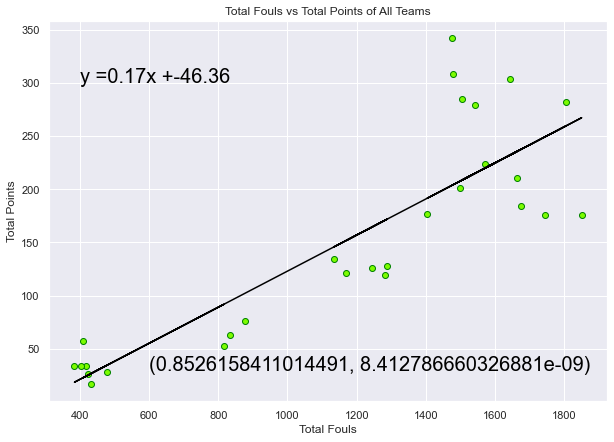

In [37]:

plt.figure(figsize =(10, 7)) 
corr=sts.pearsonr(stats['Total Fouls'], stats['Total Points'])
plt.scatter(stats['Total Fouls'], stats['Total Points'], facecolor='lawngreen', edgecolor='green')
(slope, intercept, rvalue,pvalue,stderr)= linregress(stats['Total Fouls'], stats['Total Points'])
regress_val = stats['Total Fouls']*slope+intercept
line_eq= 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(stats['Total Fouls'],regress_val,"black")
plt.annotate(line_eq,(400,300),fontsize=20,color="black")
plt.annotate(corr,(600,30),fontsize=20,color="black")
plt.xlabel('Total Fouls')
plt.ylabel('Total Points')
plt.title('Total Fouls vs Total Points of All Teams')
plt.savefig('Presentation/FoulsvsTotpts.png')
plt.show()


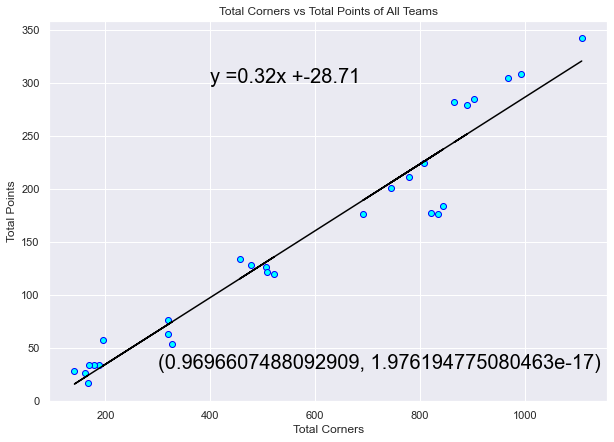

In [38]:
plt.figure(figsize =(10, 7))
corr=sts.pearsonr(stats['Total Corners'], stats['Total Points'])
plt.scatter(stats['Total Corners'], stats['Total Points'], facecolor='cyan', edgecolor='blue')
(slope, intercept, rvalue,pvalue,stderr)= linregress(stats['Total Corners'], stats['Total Points'])
regress_val = stats['Total Corners']*slope+intercept
line_eq= 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(stats['Total Corners'],regress_val,"black")
plt.annotate(line_eq,(400,300),fontsize=20,color="black")
plt.annotate(corr,(300,30),fontsize=20,color="black")
plt.xlabel('Total Corners')
plt.ylabel('Total Points')
plt.title('Total Corners vs Total Points of All Teams')
plt.savefig('Presentation/CornersvsTotpts.png')
plt.show()


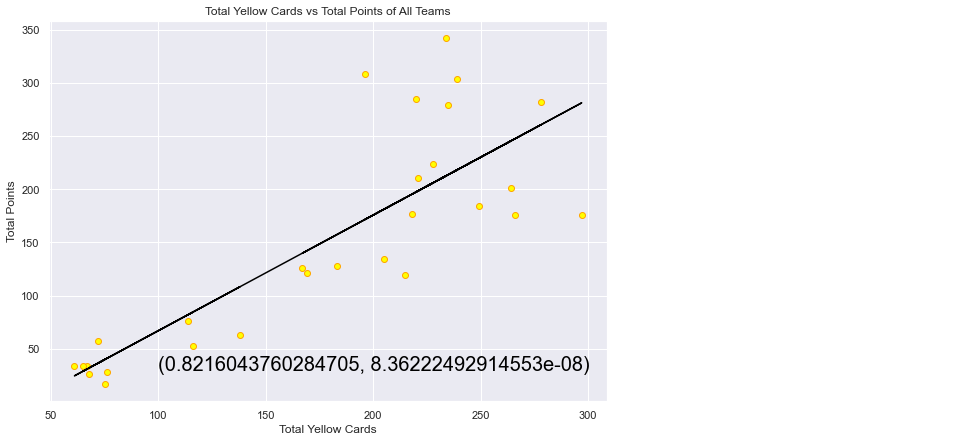

In [39]:
plt.figure(figsize =(10, 7)) 
corr=sts.pearsonr(stats['Total Yellow Cards'], stats['Total Points'])
plt.scatter(stats['Total Yellow Cards'], stats['Total Points'], facecolor='Yellow', edgecolor='orange')
(slope, intercept, rvalue,pvalue,stderr)= linregress(stats['Total Yellow Cards'], stats['Total Points'])
regress_val = stats['Total Yellow Cards']*slope+intercept
line_eq= 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(stats['Total Yellow Cards'],regress_val,"black")
plt.annotate(line_eq,(400,300),fontsize=20,color="black")
plt.annotate(corr,(100,30),fontsize=20,color="black")
plt.xlabel('Total Yellow Cards')
plt.ylabel('Total Points')
plt.title('Total Yellow Cards vs Total Points of All Teams')
plt.savefig('Presentation/YCardsvsTotpts.png')
plt.show()


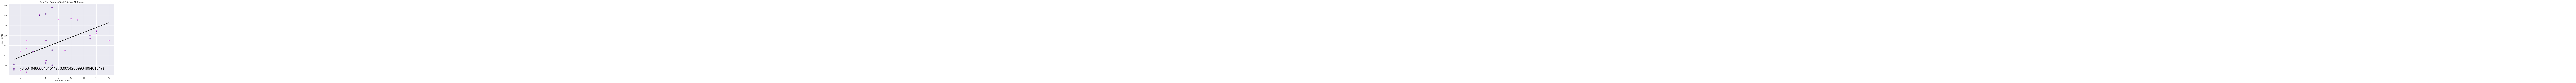

In [40]:
plt.figure(figsize =(10, 7)) 
corr=sts.pearsonr(stats['Total Red Cards'], stats['Total Points'])
plt.scatter(stats['Total Red Cards'], stats['Total Points'], facecolor='violet', edgecolor='indigo')
(slope, intercept, rvalue,pvalue,stderr)= linregress(stats['Total Red Cards'], stats['Total Points'])
regress_val = stats['Total Red Cards']*slope+intercept
line_eq= 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(stats['Total Red Cards'],regress_val,"black")
plt.annotate(line_eq,(400,300),fontsize=20,color="black")
plt.annotate(corr,(2,30),fontsize=20,color="black")
plt.xlabel('Total Red Cards')
plt.ylabel('Total Points')
plt.title('Total Red Cards vs Total Points of All Teams')
plt.savefig('Presentation/RCardsvsTotpts.png')
plt.show()


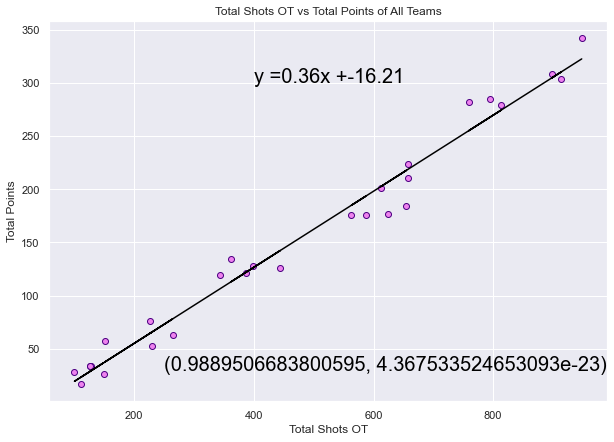

In [41]:
plt.figure(figsize =(10, 7)) 
corr=sts.pearsonr(stats['Total Shots OT'], stats['Total Points'])
plt.scatter(stats['Total Shots OT'], stats['Total Points'], facecolor='violet', edgecolor='indigo')
(slope, intercept, rvalue,pvalue,stderr)= linregress(stats['Total Shots OT'], stats['Total Points'])
regress_val = stats['Total Shots OT']*slope+intercept
line_eq= 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(stats['Total Shots OT'],regress_val,"black")
plt.annotate(line_eq,(400,300),fontsize=20,color="black")
plt.annotate(corr,(250,30),fontsize=20,color="black")
plt.xlabel('Total Shots OT')
plt.ylabel('Total Points')
plt.title('Total Shots OT vs Total Points of All Teams')
plt.savefig('Presentation/ShotsvsTotpts.png')
plt.show()


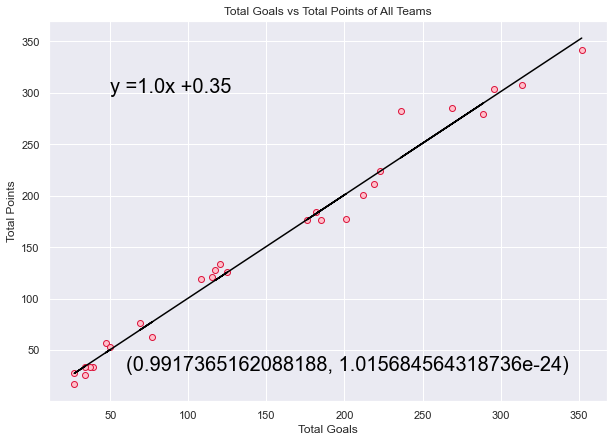

In [42]:
plt.figure(figsize =(10, 7)) 
corr=sts.pearsonr(stats['Total Goals'], stats['Total Points'])
plt.scatter(stats['Total Goals'], stats['Total Points'], facecolor='pink', edgecolor='crimson')
(slope, intercept, rvalue,pvalue,stderr)= linregress(stats['Total Goals'], stats['Total Points'])
regress_val = stats['Total Goals']*slope+intercept
line_eq= 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(stats['Total Goals'],regress_val,"black")
plt.annotate(line_eq,(50,300),fontsize=20,color="black")
plt.annotate(corr,(60,30),fontsize=20,color="black")
plt.xlabel('Total Goals')
plt.ylabel('Total Points')
plt.title('Total Goals vs Total Points of All Teams')
plt.savefig('Presentation/GoalsvsTotpts.png')
plt.show()
